# Heart Disease Health Indicators Prediction

### Importing Libraries

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from scipy.stats import yeojohnson
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.simplefilter('ignore')

### Data Preprocesing

In [2]:
rt = r'C:/Users/PC/Desktop/ML/Data/heart_disease_health_indicators.csv'

In [3]:
df = pd.read_csv(rt)
df.head(5)

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253661 entries, 0 to 253660
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HeartDiseaseorAttack  253661 non-null  int64
 1   HighBP                253661 non-null  int64
 2   HighChol              253661 non-null  int64
 3   CholCheck             253661 non-null  int64
 4   BMI                   253661 non-null  int64
 5   Smoker                253661 non-null  int64
 6   Stroke                253661 non-null  int64
 7   Diabetes              253661 non-null  int64
 8   PhysActivity          253661 non-null  int64
 9   Fruits                253661 non-null  int64
 10  Veggies               253661 non-null  int64
 11  HvyAlcoholConsump     253661 non-null  int64
 12  AnyHealthcare         253661 non-null  int64
 13  NoDocbcCost           253661 non-null  int64
 14  GenHlth               253661 non-null  int64
 15  MentHlth              253661 non-n

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
HeartDiseaseorAttack,253661.0,0.094173,0.292070,0.0,0.0,0.0,0.0,1.0
HighBP,253661.0,0.428990,0.494933,0.0,0.0,0.0,1.0,1.0
HighChol,253661.0,0.424113,0.494209,0.0,0.0,0.0,1.0,1.0
CholCheck,253661.0,0.962667,0.189578,0.0,1.0,1.0,1.0,1.0
BMI,253661.0,28.382475,6.608638,12.0,24.0,27.0,31.0,98.0
Smoker,253661.0,0.443186,0.496763,0.0,0.0,0.0,1.0,1.0
Stroke,253661.0,0.040570,0.197292,0.0,0.0,0.0,0.0,1.0
Diabetes,253661.0,0.296904,0.698147,0.0,0.0,0.0,0.0,2.0
PhysActivity,253661.0,0.756577,0.429149,0.0,1.0,1.0,1.0,1.0
Fruits,253661.0,0.634264,0.481637,0.0,0.0,1.0,1.0,1.0


In [6]:
df.median()

HeartDiseaseorAttack     0.0
HighBP                   0.0
HighChol                 0.0
CholCheck                1.0
BMI                     27.0
Smoker                   0.0
Stroke                   0.0
Diabetes                 0.0
PhysActivity             1.0
Fruits                   1.0
Veggies                  1.0
HvyAlcoholConsump        0.0
AnyHealthcare            1.0
NoDocbcCost              0.0
GenHlth                  2.0
MentHlth                 0.0
PhysHlth                 0.0
DiffWalk                 0.0
Sex                      0.0
Age                      8.0
Education                5.0
Income                   7.0
dtype: float64

In [7]:
df.skew()

HeartDiseaseorAttack    2.778996
HighBP                  0.286951
HighChol                0.307106
CholCheck              -4.881066
BMI                     2.122139
Smoker                  0.228739
Stroke                  4.657399
Diabetes                1.976487
PhysActivity           -1.195755
Fruits                 -0.557536
Veggies                -1.592384
HvyAlcoholConsump       3.853959
AnyHealthcare          -4.180933
NoDocbcCost             2.995603
GenHlth                 0.422903
MentHlth                2.721167
PhysHlth                2.207408
DiffWalk                1.773938
Sex                     0.240328
Age                    -0.359960
Education              -0.777131
Income                 -0.891452
dtype: float64

In [8]:
df.isnull().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [9]:
df.quantile()

HeartDiseaseorAttack     0.0
HighBP                   0.0
HighChol                 0.0
CholCheck                1.0
BMI                     27.0
Smoker                   0.0
Stroke                   0.0
Diabetes                 0.0
PhysActivity             1.0
Fruits                   1.0
Veggies                  1.0
HvyAlcoholConsump        0.0
AnyHealthcare            1.0
NoDocbcCost              0.0
GenHlth                  2.0
MentHlth                 0.0
PhysHlth                 0.0
DiffWalk                 0.0
Sex                      0.0
Age                      8.0
Education                5.0
Income                   7.0
Name: 0.5, dtype: float64

In [10]:
df.columns

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [11]:
df.shape

(253661, 22)

### Exploratory Data Analysis

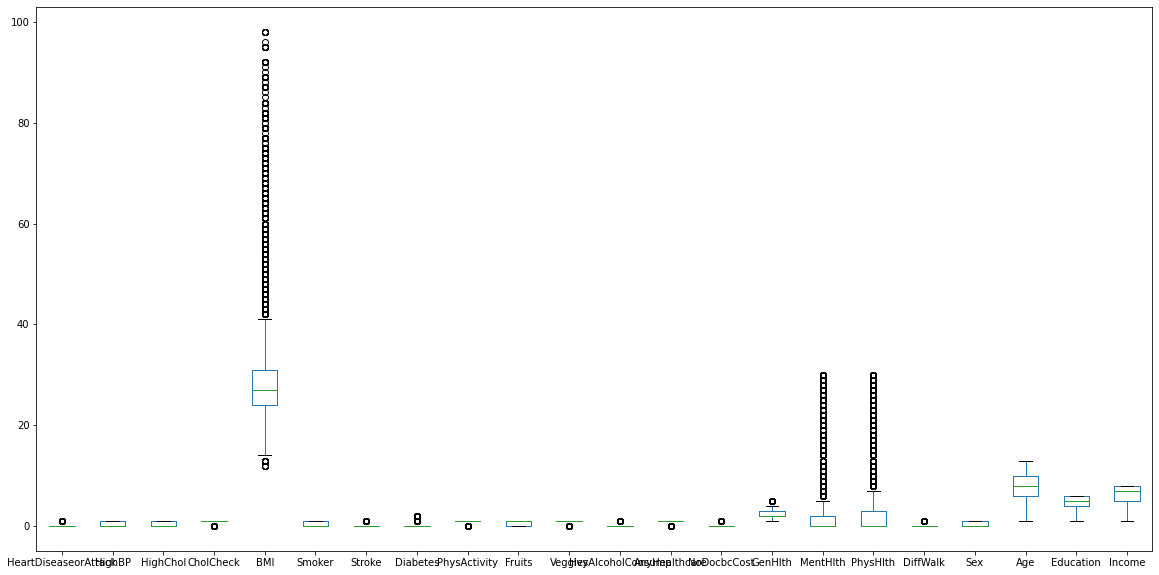

In [14]:
df.boxplot(figsize=(20,10), grid = False)

plt.show()

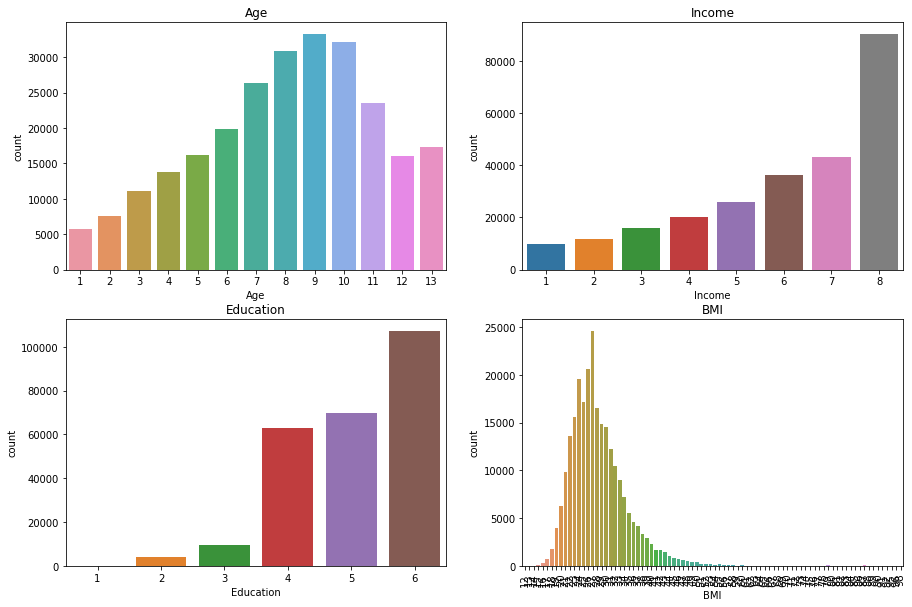

In [15]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

sns.countplot(data = df , x = 'Age',ax = ax[0,0])
sns.countplot(data = df , x = 'Income',ax = ax[0,1])
sns.countplot(data = df , x = 'Education',ax = ax[1,0])
sns.countplot(data = df , x = 'BMI',ax = ax[1,1])

ax[0, 0].set_title('Age')
ax[0, 1].set_title('Income')
ax[1, 0].set_title('Education')
ax[1, 1].set_title('BMI')

ax[1, 1].set_xticklabels(ax[1, 1].get_xticklabels(), rotation=90)

plt.show()

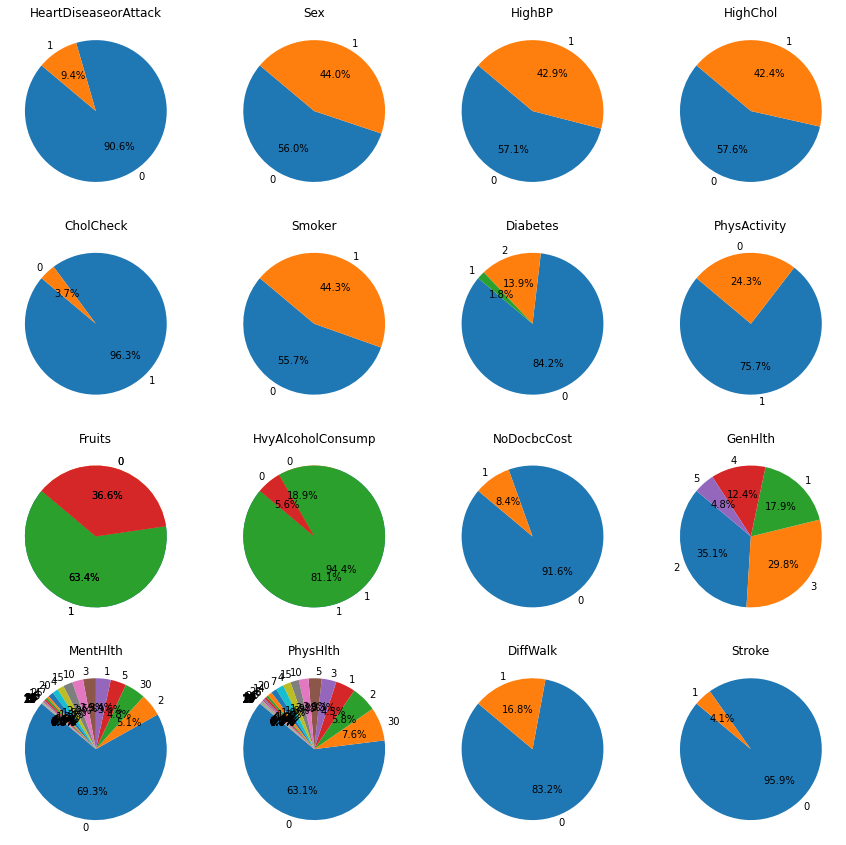

In [16]:
fig, ax = plt.subplots(4, 4, figsize=(15,15))

ax[0,0].pie(df['HeartDiseaseorAttack'].value_counts(), labels=df['HeartDiseaseorAttack'].value_counts().index, autopct='%1.1f%%', startangle=140)
ax[0,0].set_title('HeartDiseaseorAttack')

ax[0,1].pie(df['Sex'].value_counts(), labels=df['Sex'].value_counts().index, autopct='%1.1f%%', startangle=140)
ax[0,1].set_title('Sex')

ax[0,2].pie(df['HighBP'].value_counts(), labels=df['HighBP'].value_counts().index, autopct='%1.1f%%', startangle=140)
ax[0,2].set_title('HighBP')

ax[0,3].pie(df['HighChol'].value_counts(), labels=df['HighChol'].value_counts().index, autopct='%1.1f%%', startangle=140)
ax[0,3].set_title('HighChol')

ax[1,0].pie(df['CholCheck'].value_counts(), labels=df['CholCheck'].value_counts().index, autopct='%1.1f%%', startangle=140)
ax[1,0].set_title('CholCheck')

ax[1,1].pie(df['Smoker'].value_counts(), labels=df['Smoker'].value_counts().index, autopct='%1.1f%%', startangle=140)
ax[1,1].set_title('Smoker')

ax[1,2].pie(df['Diabetes'].value_counts(), labels=df['Diabetes'].value_counts().index, autopct='%1.1f%%', startangle=140)
ax[1,2].set_title('Diabetes')

ax[1,3].pie(df['PhysActivity'].value_counts(), labels=df['PhysActivity'].value_counts().index, autopct='%1.1f%%', startangle=140)
ax[1,3].set_title('PhysActivity')

ax[2,0].pie(df['Fruits'].value_counts(), labels=df['Fruits'].value_counts().index, autopct='%1.1f%%', startangle=140)
ax[2,0].set_title('Fruits')

ax[2,1].pie(df['Veggies'].value_counts(), labels=df['Veggies'].value_counts().index, autopct='%1.1f%%', startangle=140)
ax[2,1].set_title('Veggies')

ax[2,0].pie(df['Fruits'].value_counts(), labels=df['Fruits'].value_counts().index, autopct='%1.1f%%', startangle=140)
ax[2,0].set_title('Fruits')

ax[2,1].pie(df['HvyAlcoholConsump'].value_counts(), labels=df['AnyHealthcare'].value_counts().index, autopct='%1.1f%%', startangle=140)
ax[2,1].set_title('HvyAlcoholConsump')

ax[2,2].pie(df['NoDocbcCost'].value_counts(), labels=df['NoDocbcCost'].value_counts().index, autopct='%1.1f%%', startangle=140)
ax[2,2].set_title('NoDocbcCost')

ax[2,3].pie(df['GenHlth'].value_counts(), labels=df['GenHlth'].value_counts().index, autopct='%1.1f%%', startangle=140)
ax[2,3].set_title('GenHlth')

ax[3,0].pie(df['MentHlth'].value_counts(), labels=df['MentHlth'].value_counts().index, autopct='%1.1f%%', startangle=140)
ax[3,0].set_title('MentHlth')

ax[3,1].pie(df['PhysHlth'].value_counts(), labels=df['PhysHlth'].value_counts().index, autopct='%1.1f%%', startangle=140)
ax[3,1].set_title('PhysHlth')

ax[3,2].pie(df['DiffWalk'].value_counts(), labels=df['DiffWalk'].value_counts().index, autopct='%1.1f%%', startangle=140)
ax[3,2].set_title('DiffWalk')

ax[3,3].pie(df['Stroke'].value_counts(), labels=df['Stroke'].value_counts().index, autopct='%1.1f%%', startangle=140)
ax[3,3].set_title('Stroke')

plt.show()

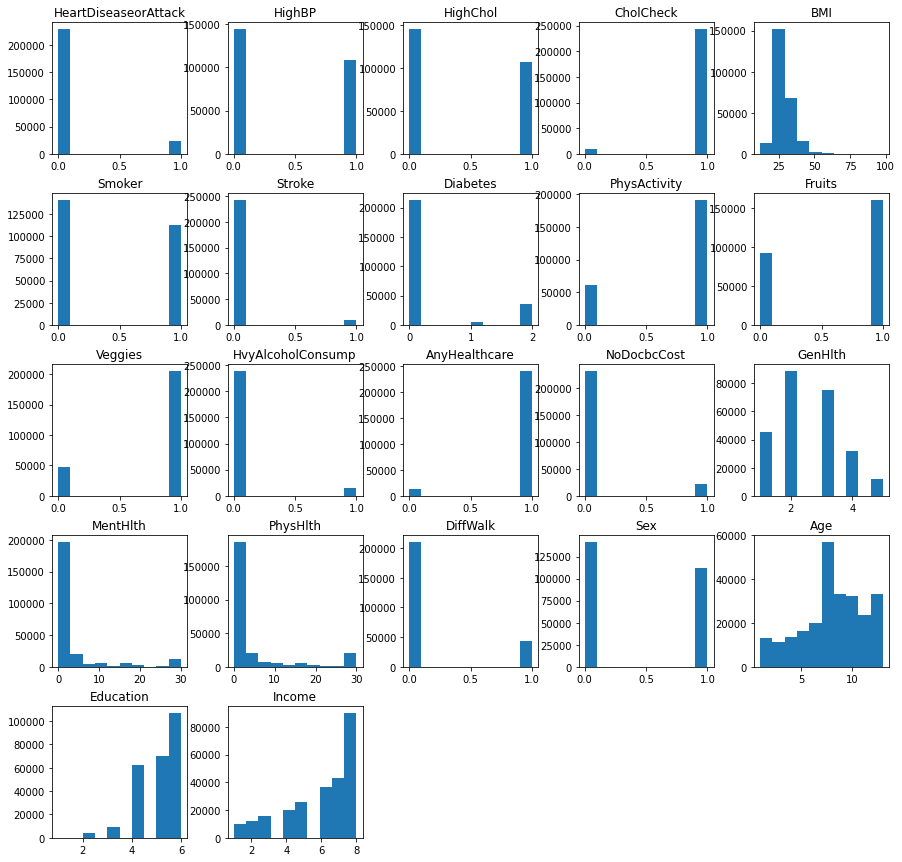

In [17]:
df.hist(figsize =(15,15), grid = False)
plt.show()

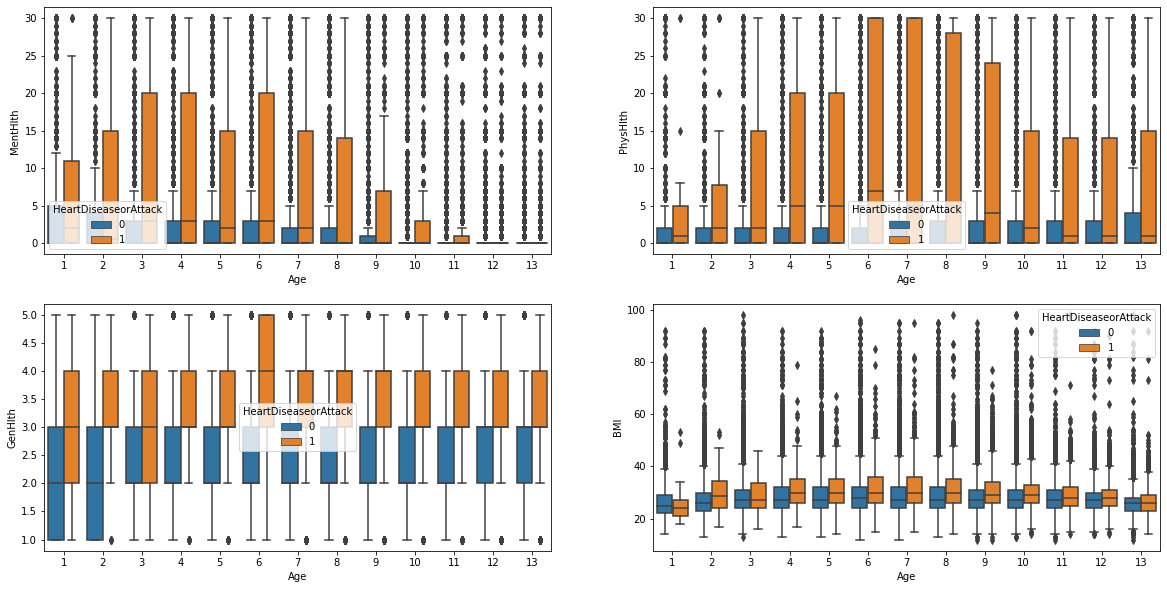

In [19]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))

sns.boxplot(data=df, x='Age', y='MentHlth', hue='HeartDiseaseorAttack',ax = ax[0,0])
sns.boxplot(data=df, x='Age', y='PhysHlth', hue='HeartDiseaseorAttack',ax = ax[0,1])
sns.boxplot(data=df, x='Age', y='GenHlth', hue='HeartDiseaseorAttack',ax = ax[1,0])
sns.boxplot(data=df, x='Age', y='BMI', hue='HeartDiseaseorAttack',ax = ax[1,1])

plt.show()

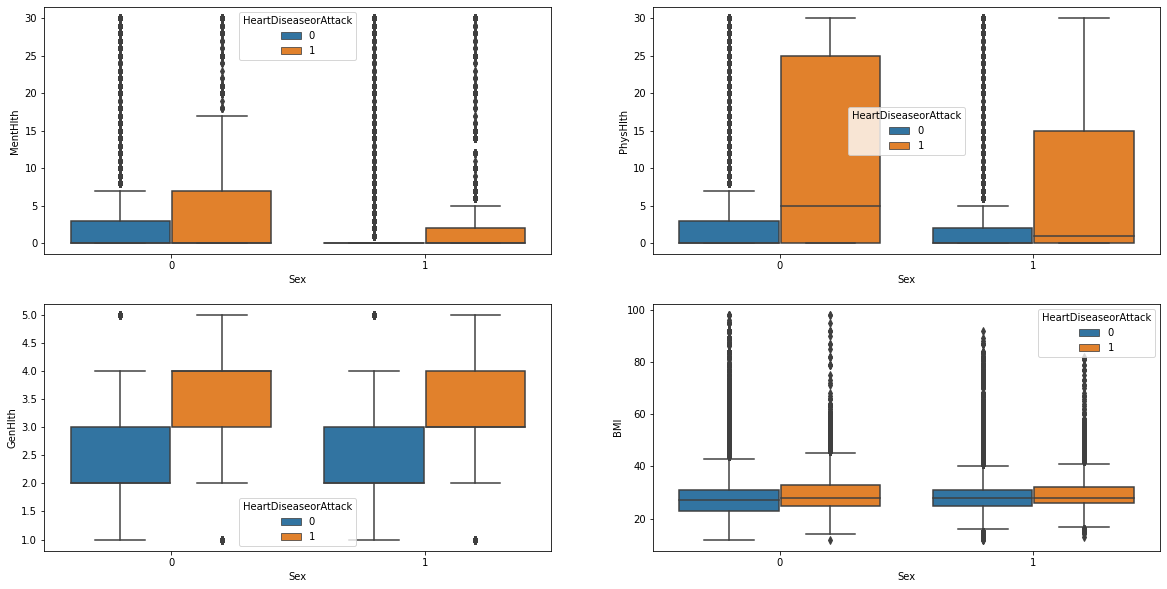

In [20]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))

sns.boxplot(data=df, x='Sex', y='MentHlth', hue='HeartDiseaseorAttack',ax = ax[0,0])
sns.boxplot(data=df, x='Sex', y='PhysHlth', hue='HeartDiseaseorAttack',ax = ax[0,1])
sns.boxplot(data=df, x='Sex', y='GenHlth', hue='HeartDiseaseorAttack',ax = ax[1,0])
sns.boxplot(data=df, x='Sex', y='BMI', hue='HeartDiseaseorAttack',ax = ax[1,1])

plt.show()

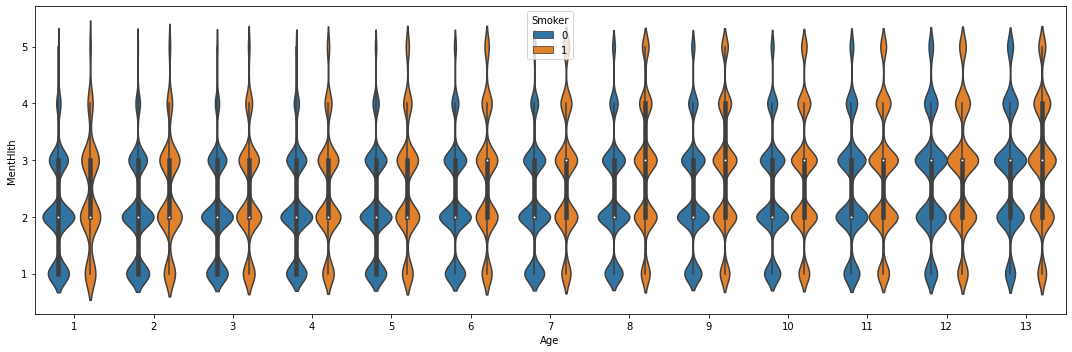

In [21]:
plt.figure(figsize=(15, 5))

sns.violinplot(data=df, x='Age', y='GenHlth', hue='Smoker')

plt.xlabel('Age')
plt.ylabel('MentHlth')
plt.grid(False)
plt.tight_layout()
plt.show()

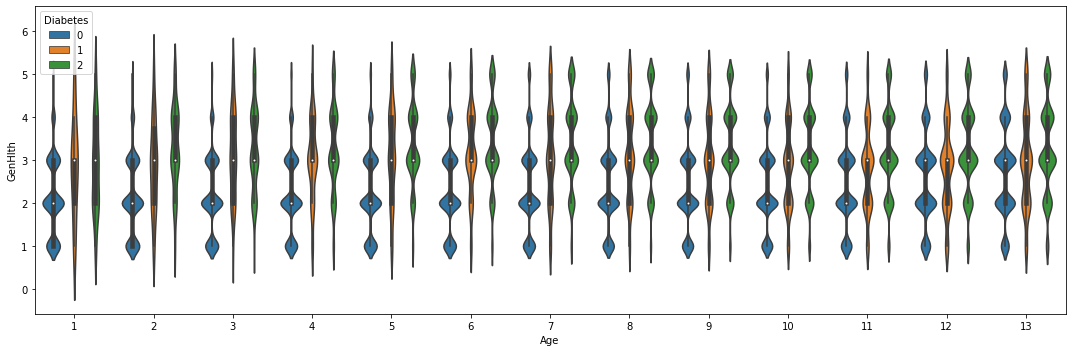

In [22]:
plt.figure(figsize=(15, 5))

sns.violinplot(data=df, x='Age', y='GenHlth', hue='Diabetes')

plt.xlabel('Age')
plt.ylabel('GenHlth')
plt.grid(False)
plt.tight_layout()
plt.show()

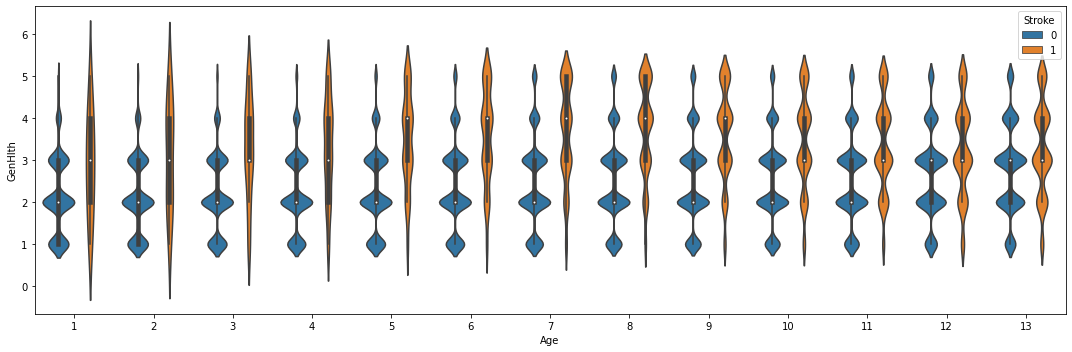

In [23]:
plt.figure(figsize=(15, 5))

sns.violinplot(data=df, x='Age', y='GenHlth', hue='Stroke')

plt.xlabel('Age')
plt.ylabel('GenHlth')
plt.grid(False)
plt.tight_layout()
plt.show()

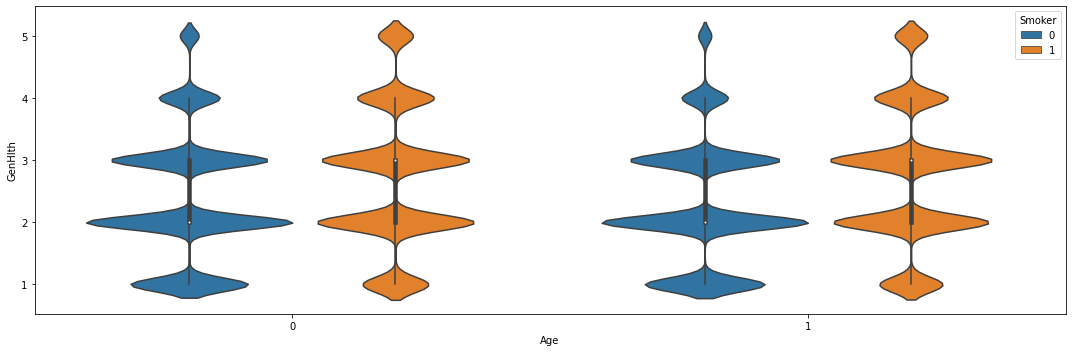

In [24]:
plt.figure(figsize=(15, 5))

sns.violinplot(data=df, x='Sex', y='GenHlth', hue='Smoker')

plt.xlabel('Age')
plt.ylabel('GenHlth')
plt.grid(False)
plt.tight_layout()
plt.show()

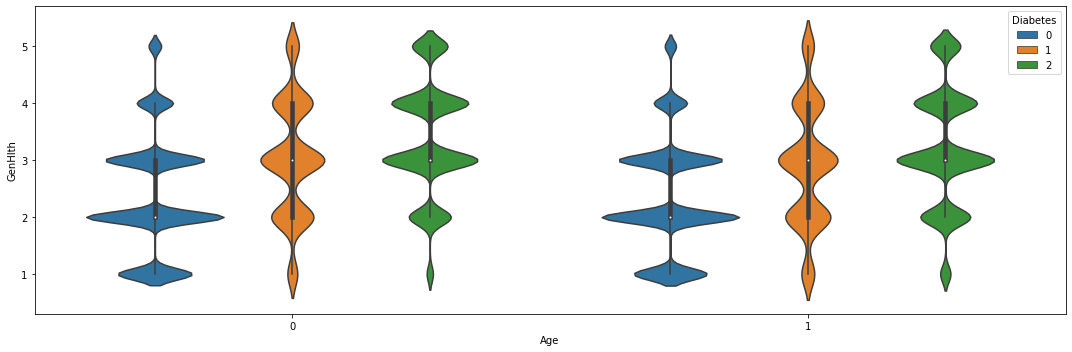

In [25]:
plt.figure(figsize=(15, 5))

sns.violinplot(data=df, x='Sex', y='GenHlth', hue='Diabetes')

plt.xlabel('Age')
plt.ylabel('GenHlth')
plt.grid(False)
plt.tight_layout()
plt.show()

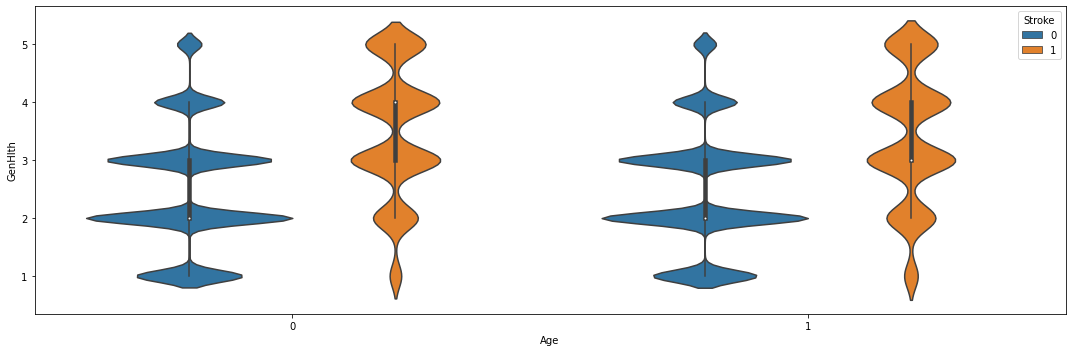

In [26]:
plt.figure(figsize=(15, 5))

sns.violinplot(data=df, x='Sex', y='GenHlth', hue='Stroke')

plt.xlabel('Age')
plt.ylabel('GenHlth')
plt.grid(False)
plt.tight_layout()
plt.show()

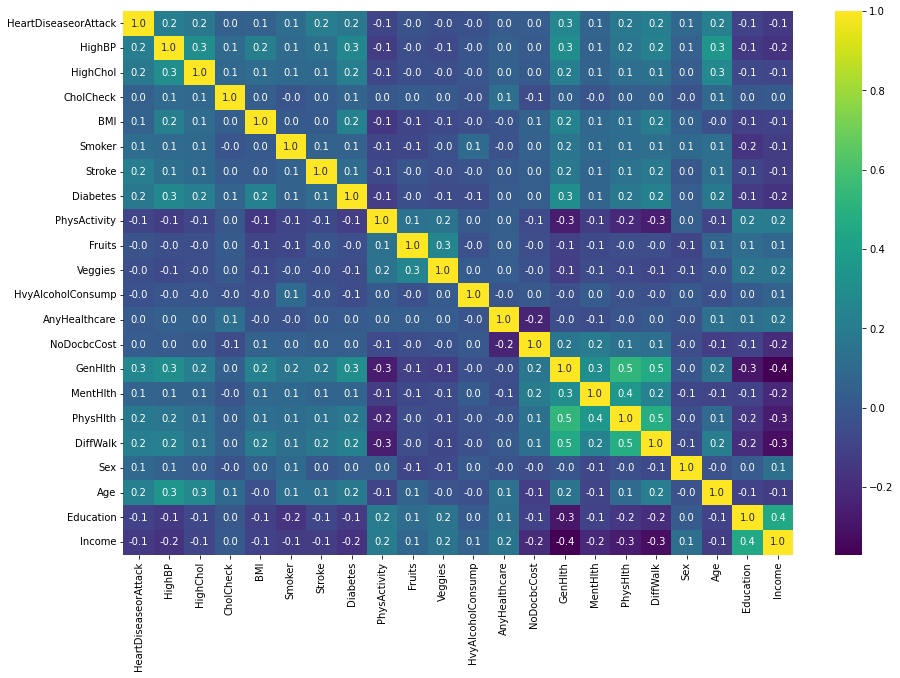

In [27]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot = True, fmt = '.1f', cmap='viridis')
plt.show()

### Modeling and Evaluation

In [28]:
X_M = df.drop(['HeartDiseaseorAttack', 'Education', 'NoDocbcCost','CholCheck'], axis = 1)
Y_M = df['HeartDiseaseorAttack']
scaler = MinMaxScaler()
x = scaler.fit_transform(X_M)

### Train Test Split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(x, Y_M, test_size=0.30, random_state=42)

### Logistic Regression

In [30]:
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)
logistic_model.score(X_train, y_train)
model_pred_L = logistic_model.predict(X_test)

print(classification_report(y_test, model_pred_L))
print("accuracy: ",accuracy_score(y_test, model_pred_L))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_pred_L))
print("mean_squared_error: ",mean_squared_error(y_test, model_pred_L))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     69098
           1       0.53      0.13      0.20      7001

    accuracy                           0.91     76099
   macro avg       0.72      0.56      0.58     76099
weighted avg       0.88      0.91      0.88     76099

accuracy:  0.909157807592741
mean_absolute_error:  0.09084219240725896
mean_squared_error:  0.09084219240725896


### Random Forest Classifier

In [31]:
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)
random_forest_model.score(X_train, y_train)
model_pred_R = random_forest_model.predict(X_test)

print(classification_report(y_test, model_pred_R))
print("accuracy: ",accuracy_score(y_test, model_pred_R))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_pred_R))
print("mean_squared_error: ",mean_squared_error(y_test, model_pred_R))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     69098
           1       0.41      0.13      0.19      7001

    accuracy                           0.90     76099
   macro avg       0.66      0.55      0.57     76099
weighted avg       0.87      0.90      0.88     76099

accuracy:  0.9027976714542898
mean_absolute_error:  0.09720232854571019
mean_squared_error:  0.09720232854571019


### Decision Tree

In [32]:
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)
decision_tree_model.score(X_train, y_train)
model_pred_T = decision_tree_model.predict(X_test)

print(classification_report(y_test, model_pred_T))
print("accuracy: ",accuracy_score(y_test, model_pred_T))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_pred_T))
print("mean_squared_error: ",mean_squared_error(y_test, model_pred_T))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92     69098
           1       0.24      0.27      0.26      7001

    accuracy                           0.86     76099
   macro avg       0.58      0.59      0.59     76099
weighted avg       0.86      0.86      0.86     76099

accuracy:  0.8552017766330701
mean_absolute_error:  0.1447982233669299
mean_squared_error:  0.1447982233669299


### KNeighborsClassifier

In [34]:
model_NEG = KNeighborsClassifier(n_neighbors=5)
model_NEG.fit(X_train, y_train)
model_NEG.score(X_train, y_train)
model_NEG_Pred = model_NEG.predict(X_test)

print(classification_report(y_test, model_NEG_Pred))
print("accuracy: ",accuracy_score(y_test, model_NEG_Pred))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_NEG_Pred))
print("mean_squared_error: ",mean_squared_error(y_test, model_NEG_Pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     69098
           1       0.39      0.16      0.23      7001

    accuracy                           0.90     76099
   macro avg       0.66      0.57      0.59     76099
weighted avg       0.87      0.90      0.88     76099

accuracy:  0.8995913218307731
mean_absolute_error:  0.10040867816922693
mean_squared_error:  0.10040867816922693


### Boosting Classifier

In [37]:
model_gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
model_gb.fit(X_train, y_train)
model_gb.score(X_train, y_train)
model_gb_pred = model_NEG.predict(X_test)

print(classification_report(y_test, model_gb_pred))
print("accuracy: ",accuracy_score(y_test, model_gb_pred))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_gb_pred))
print("mean_squared_error: ",mean_squared_error(y_test, model_gb_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     69098
           1       0.39      0.16      0.23      7001

    accuracy                           0.90     76099
   macro avg       0.66      0.57      0.59     76099
weighted avg       0.87      0.90      0.88     76099

accuracy:  0.8995913218307731
mean_absolute_error:  0.10040867816922693
mean_squared_error:  0.10040867816922693


0    69098
1     7001
Name: HeartDiseaseorAttack, dtype: int64


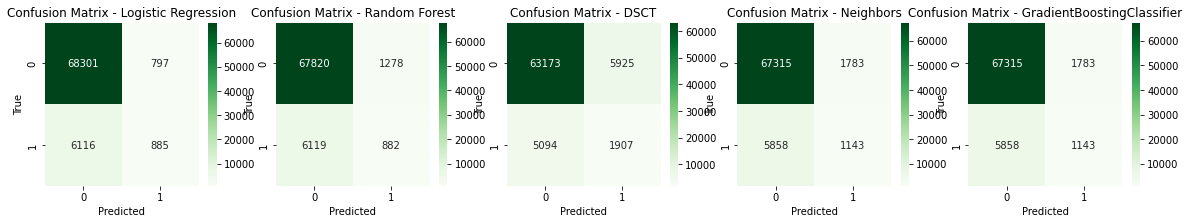

In [43]:
RLOG = confusion_matrix(y_test, model_pred_L)
RMFC = confusion_matrix(y_test, model_pred_R)
DSCT = confusion_matrix(y_test, model_pred_T)
NEG = confusion_matrix(y_test, model_NEG_Pred)
gb = confusion_matrix(y_test, model_gb_pred)

fig, axes = plt.subplots(1, 5, figsize=(20, 3))

sns.heatmap(RLOG, annot=True, cmap='Greens', fmt='g', ax=axes[0])
axes[0].set_title('Confusion Matrix - Logistic Regression')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

sns.heatmap(RMFC, annot=True, cmap='Greens', fmt='g', ax=axes[1])
axes[1].set_title('Confusion Matrix - Random Forest')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

sns.heatmap(DSCT, annot=True, cmap='Greens', fmt='g', ax=axes[2])
axes[2].set_title('Confusion Matrix - DSCT')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('True')

sns.heatmap(NEG, annot=True, cmap='Greens', fmt='g', ax=axes[3])
axes[3].set_title('Confusion Matrix - Neighbors')
axes[3].set_xlabel('Predicted')
axes[3].set_ylabel('True')

sns.heatmap(gb, annot=True, cmap='Greens', fmt='g', ax=axes[4])
axes[4].set_title('Confusion Matrix - GradientBoostingClassifier')
axes[4].set_xlabel('Predicted')
axes[4].set_ylabel('True')

print(y_test.value_counts())
plt.show()

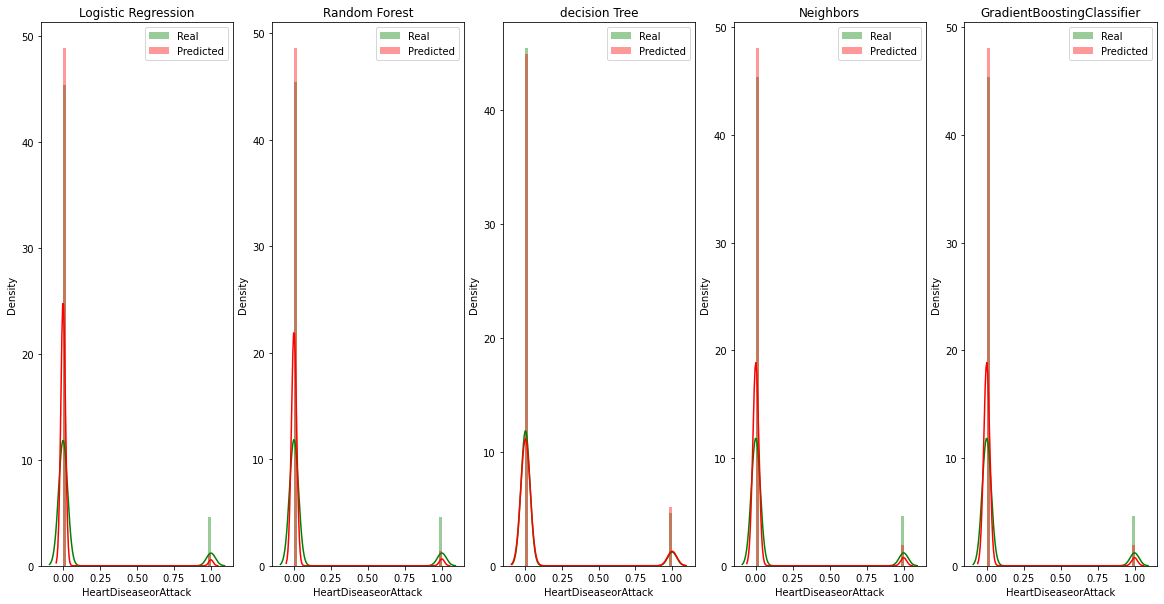

In [45]:
fig, ax = plt.subplots(1, 5, figsize=(20,10))

sns.distplot(y_test, label='Real', ax=ax[0], color = 'Green')
sns.distplot(model_pred_L, label='Predicted', ax=ax[0],  color = 'red')

sns.distplot(y_test, label='Real', ax=ax[1], color = 'Green')
sns.distplot(model_pred_R, label='Predicted', ax=ax[1], color = 'red')

sns.distplot(y_test, label='Real', ax=ax[2], color = 'Green')
sns.distplot(model_pred_T, label='Predicted', ax=ax[2], color = 'red')

sns.distplot(y_test, label='Real', ax=ax[3], color = 'Green')
sns.distplot(model_NEG_Pred, label='Predicted', ax=ax[3], color = 'red')

sns.distplot(y_test, label='Real', ax=ax[4], color = 'Green')
sns.distplot(model_gb_pred, label='Predicted', ax=ax[4], color = 'red')

ax[0].set_title('Logistic Regression')
ax[1].set_title('Random Forest')
ax[2].set_title('decision Tree')
ax[3].set_title('Neighbors')
ax[4].set_title('GradientBoostingClassifier')

ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()
ax[4].legend()

plt.show()